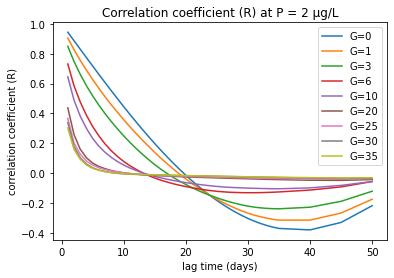

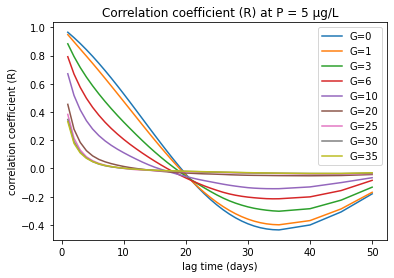

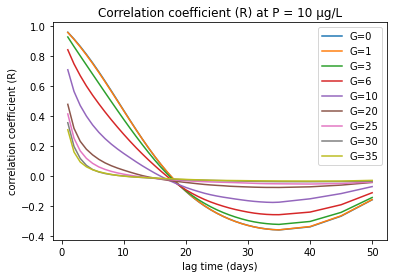

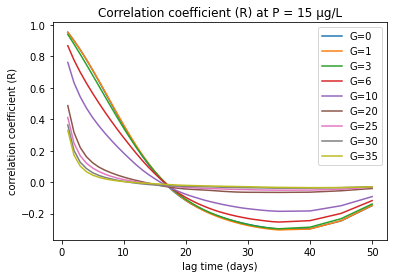

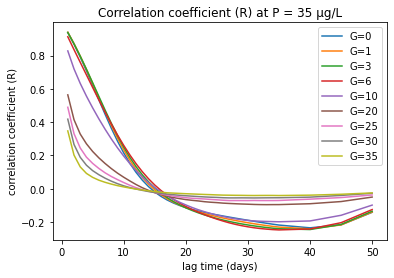

<Figure size 432x288 with 0 Axes>

In [2]:
# Nutrient auto correlation
import matplotlib.pyplot as plt
import xarray as xr
import numpy

LAGS = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50]) * 24 * 2  # in days to time steps
nutrient =[2,5,10,15,35]
for k in nutrient:
    biomass_grid1 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g0/biomass_data.nc")
    biomass_grid2 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g1/biomass_data.nc")
    biomass_grid3 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g3/biomass_data.nc")
    biomass_grid4 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g6/biomass_data.nc")
    biomass_grid5 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g10/biomass_data.nc")
    biomass_grid6 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g20/biomass_data.nc")
    biomass_grid7 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g25/biomass_data.nc")
    biomass_grid8 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g30/biomass_data.nc")
    biomass_grid9 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g35/biomass_data.nc")


    def autocorrelate(data):
         ndata = data - numpy.mean(data)
         acorr = numpy.correlate(ndata, ndata, 'full')[len(ndata)-1:]
         return acorr / numpy.var(data) / len(ndata)

    def Rmean_lags(biomass_g):
    
        X = biomass_g["X"]
        Y = biomass_g['Y']

        outarray = xr.zeros_like(biomass_g)
        for x in range(len(X)):
            for y in range(len(Y)):
                tempp = biomass_g.data[:, y, x]
                acorr = autocorrelate(tempp)
                outarray[:, y, x] = acorr
        Rmean = outarray.mean(['X', 'Y'])
    
    
        Rmean_lags = []
        for j in LAGS:
            Rmean_lags.append(Rmean[j])
        return Rmean_lags

    plot1 = Rmean_lags(biomass_grid1)
    plot2 = Rmean_lags(biomass_grid2)
    plot3 = Rmean_lags(biomass_grid3)
    plot4 = Rmean_lags(biomass_grid4)
    plot5 = Rmean_lags(biomass_grid5)
    plot6 = Rmean_lags(biomass_grid6)
    plot7 = Rmean_lags(biomass_grid7)
    plot8 = Rmean_lags(biomass_grid8)
    plot9 = Rmean_lags(biomass_grid9)

    import matplotlib.pyplot as plt

    plt.plot(LAGS/48, plot1, label="G=0")
    plt.plot(LAGS/48, plot2, label="G=1")
    plt.plot(LAGS/48, plot3, label="G=3")
    plt.plot(LAGS/48, plot4, label="G=6")
    plt.plot(LAGS/48, plot5, label="G=10")
    plt.plot(LAGS/48, plot6, label="G=20")
    plt.plot(LAGS/48, plot7, label="G=25")
    plt.plot(LAGS/48, plot8, label="G=30")
    plt.plot(LAGS/48, plot9, label="G=35")

    plt.ylabel("correlation coefficient (R)")
    plt.title(f"Correlation coefficient (R) at P = {k} μg/L")
    plt.xlabel("lag time (days)")
    plt.legend()
    #plt.savefig(f"data/model_runs/scenario_kp10/scenario/mean_corr_timeline_nutrient/p{k}_coeff.jpg")
    plt.show()
    plt.clf()
    


In [3]:
outarray

NameError: name 'outarray' is not defined

In [ ]:
#GRAZER auto correlation
import matplotlib.pyplot as plt
import xarray as xr
import numpy

LAGS = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50]) * 24 * 2  # in days to time steps
grazer = [0,1,3,6,10,20,25,30,35]
for j in grazer:
    biomass_grid1 = xr.open_dataarray(f"data/model_runs/scenario/p2-g{j}/biomass_data.nc")
    biomass_grid2 = xr.open_dataarray(f"data/model_runs/scenario/p5-g{j}/biomass_data.nc")
    biomass_grid3 = xr.open_dataarray(f"data/model_runs/scenario/p10-g{j}/biomass_data.nc")
    biomass_grid4 = xr.open_dataarray(f"data/model_runs/scenario/p15-g{j}/biomass_data.nc")
    biomass_grid5 = xr.open_dataarray(f"data/model_runs/scenario/p35-g{j}/biomass_data.nc")



    def autocorrelate(data):
         ndata = data - numpy.mean(data)
         acorr = numpy.correlate(ndata, ndata, 'full')[len(ndata)-1:]
         return acorr / numpy.var(data) / len(ndata)

    def Rmean_lags(biomass_g):
    
        X = biomass_grid1["X"]
        Y = biomass_grid1['Y']

        outarray = xr.zeros_like(biomass_g)
        for x in range(len(X)):
            for y in range(len(Y)):
                tempp = biomass_g.data[:, y, x]
                acorr = autocorrelate(tempp)
                outarray[:, y, x] = acorr
        Rmean = outarray.mean(['X', 'Y'])
    
    
        Rmean_lags = []
        for j in LAGS:
            Rmean_lags.append(Rmean[j])
        return Rmean_lags

    plot1 = Rmean_lags(biomass_grid1)
    plot2 = Rmean_lags(biomass_grid2)
    plot3 = Rmean_lags(biomass_grid3)
    plot4 = Rmean_lags(biomass_grid4)
    plot5 = Rmean_lags(biomass_grid5)

    import matplotlib.pyplot as plt

    plt.plot(LAGS/48, plot1, label="P=2")
    plt.plot(LAGS/48, plot2, label="P=5")
    plt.plot(LAGS/48, plot3, label="P=10")
    plt.plot(LAGS/48, plot4, label="P=15")
    plt.plot(LAGS/48, plot5, label="P=35")


    plt.ylabel("correlation coefficient (R)")
    plt.title(f"Correlation coefficient (R) at G = {j} grazer")
    plt.xlabel("lag time (days)")
    plt.legend()
    plt.savefig(f"data/model_runs/scenario_kp10/scenario/mean_corr_timeline_grazer/G{j}_coeff.jpg")
    plt.clf()



In [12]:
# Mean correlation timeline
import matplotlib.pyplot as plt
import xarray as xr
import numpy
from pathlib import Path

nutrient =[2,5,10,15,35]
grazer = [0,1,3,6,10,20,25,30,35]
for j in grazer:
    for k in nutrient:
        LAGS = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50]) * 24 * 2
        data = Path(f"data/model_runs/scenario_kp10/scenario/p{k}-g{j}/biomass_data.nc")
        varpar= data.parent/'mean_correlation_timeline'
        varpar.mkdir(exist_ok=True)
        biomass_grids = xr.open_dataarray(data)


        def autocorrelate(data):
             ndata = data - numpy.mean(data)
             acorr = numpy.correlate(ndata, ndata, 'full')[len(ndata)-1:]
             return acorr / numpy.var(data) / len(ndata)

        def Rmean_lags(biomass_g):
    
            X = biomass_g["X"]
            Y = biomass_g['Y']

            outarray = xr.zeros_like(biomass_g)
            for x in range(len(X)):
                for y in range(len(Y)):
                    tempp = biomass_g.data[:, y, x]
                    acorr = autocorrelate(tempp)
                    outarray[:, y, x] = acorr
            Rmean = outarray.mean(['X', 'Y'])
    
            Rmean_lags = []
            for l in LAGS:
                Rmean_lags.append(Rmean[l])
            return Rmean_lags

        grid = Rmean_lags(biomass_grids)


       
        outpath = varpar/'corr_line.jpg'
        plt.plot(LAGS/48, grid)

        plt.ylabel("correlation coefficient (R)")
        plt.title(f"Correlation coefficient (R) at P = {k}, G={j}")
        plt.xlabel("lag time (days)")
        #plt.legend()
        plt.savefig(outpath)
        plt.clf()



<Figure size 432x288 with 0 Axes>

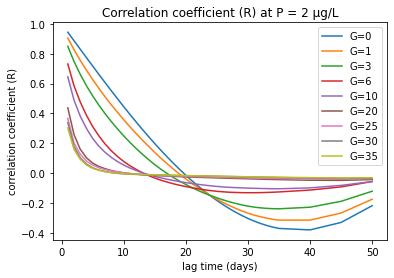

In [24]:
# Nutrient auto correlation
import matplotlib.pyplot as plt
import xarray as xr
import numpy

LAGS = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50]) * 24 * 2  # in days to time steps
nutrient =[2]
for k in nutrient:
    biomass_grid1 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g0/biomass_data.nc")
    biomass_grid2 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g1/biomass_data.nc")
    biomass_grid3 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g3/biomass_data.nc")
    biomass_grid4 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g6/biomass_data.nc")
    biomass_grid5 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g10/biomass_data.nc")
    biomass_grid6 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g20/biomass_data.nc")
    biomass_grid7 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g25/biomass_data.nc")
    biomass_grid8 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g30/biomass_data.nc")
    biomass_grid9 = xr.open_dataarray(f"data/model_runs/scenario_kp10/scenario/p{k}-g35/biomass_data.nc")


    def autocorrelate(data):
         ndata = data - numpy.mean(data)
         acorr = numpy.correlate(ndata, ndata, 'full')[len(ndata)-1:]
         return acorr / numpy.var(data) / len(ndata)

    def Rmean_lags(biomass_g):
    
        X = biomass_g["X"]
        Y = biomass_g['Y']

        outarray = xr.zeros_like(biomass_g)
        for x in range(len(X)):
            for y in range(len(Y)):
                tempp = biomass_g.data[:, y, x]
                acorr = autocorrelate(tempp)
                outarray[:, y, x] = acorr
        Rmean = outarray.mean(['X', 'Y'])
    
    
        Rmean_lags = []
        for j in LAGS:
            Rmean_lags.append(Rmean[j])
        return Rmean_lags

    plot1 = Rmean_lags(biomass_grid1)
    plot2 = Rmean_lags(biomass_grid2)
    plot3 = Rmean_lags(biomass_grid3)
    plot4 = Rmean_lags(biomass_grid4)
    plot5 = Rmean_lags(biomass_grid5)
    plot6 = Rmean_lags(biomass_grid6)
    plot7 = Rmean_lags(biomass_grid7)
    plot8 = Rmean_lags(biomass_grid8)
    plot9 = Rmean_lags(biomass_grid9)

    import matplotlib.pyplot as plt

    plt.plot(LAGS/48, plot1, label="G=0")
    plt.plot(LAGS/48, plot2, label="G=1")
    plt.plot(LAGS/48, plot3, label="G=3")
    plt.plot(LAGS/48, plot4, label="G=6")
    plt.plot(LAGS/48, plot5, label="G=10")
    plt.plot(LAGS/48, plot6, label="G=20")
    plt.plot(LAGS/48, plot7, label="G=25")
    plt.plot(LAGS/48, plot8, label="G=30")
    plt.plot(LAGS/48, plot9, label="G=35")

    plt.ylabel("correlation coefficient (R)")
    plt.title(f"Correlation coefficient (R) at P = {k} μg/L")
    plt.xlabel("lag time (days)")
    plt.legend()
    #plt.savefig(f"data/model_runs/scenario_kp10/scenario/mean_corr_timeline_nutrient/p{k}_coeff.jpg")
    plt.show()
    #plt.clf()
    

In [25]:

biomass_grid1.coords["time"] = biomass_grid1.time / 1440
biomass_grid1 = biomass_grid1.transpose("X", "Y", "time").load()
biomass_grid1_slice = biomass_grid1.isel(time=slice(7,56))
biomass_grid1_slice

<xarray.DataArray 'biofilm_biomass' (X: 50, Y: 50, time: 49)>
array([[[0.16568872, 0.16615843, 0.16664352, ..., 0.17764088,
         0.17809204, 0.1785745 ],
        [0.06036997, 0.06054725, 0.0607303 , ..., 0.06494461,
         0.06511597, 0.06529909],
        [0.030276  , 0.03036536, 0.03045763, ..., 0.03258073,
         0.03266717, 0.03275955],
        ...,
        [0.22638141, 0.22701194, 0.22766313, ..., 0.24233655,
         0.24294034, 0.24358622],
        [0.17216651, 0.17265302, 0.17315548, ..., 0.18452347,
         0.18499046, 0.18548992],
        [0.07964936, 0.0798822 , 0.0801226 , ..., 0.08565246,
         0.08587737, 0.0861177 ]],

       [[0.23212265, 0.23277178, 0.23344209, ..., 0.24862769,
         0.24924997, 0.24991538],
        [0.20714049, 0.20772189, 0.20832229, ..., 0.22190712,
         0.22246467, 0.22306094],
        [0.1308834 , 0.13125731, 0.13164345, ..., 0.14040639,
         0.14076592, 0.14115041],
...
        [0.11433279, 0.11465973, 0.1149974 , ..., 0.12264276,
         0.12295711, 0.12329334],
        [0.1079484 , 0.10825901, 0.10857977, ..., 0.11587997,
         0.11617902, 0.11649878],
        [0.13432469, 0.13470934, 0.13510655, ..., 0.14414911,
         0.14451922, 0.14491493]],

       [[0.12838843, 0.12875776, 0.12913912, ..., 0.13785124,
         0.13820695, 0.13858718],
        [0.20337568, 0.20394591, 0.20453483, ..., 0.21783487,
         0.21838154, 0.21896626],
        [0.10007721, 0.10036618, 0.10066458, ..., 0.1074698 ,
         0.1077482 , 0.10804585],
        ...,
        [0.06293943, 0.0631243 , 0.06331516, ..., 0.06771266,
         0.06789138, 0.06808233],
        [0.21177594, 0.2123688 , 0.21298106, ..., 0.2268096 ,
         0.22737785, 0.22798562],
        [0.20671521, 0.20729601, 0.2078958 , ..., 0.22148002,
         0.22203714, 0.22263291]]])
Coordinates:
  * time     (time) float64 0.1458 0.1667 0.1875 0.2083 ... 1.104 1.125 1.146
Dimensions without coordinates: X, Y

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy
da = xr.DataArray([[p2_g0,p2_g1,p2_g3,p2_g6],[p5_g0,p5_g1,p5_g3,p5_g6]], dims = ('nutrient','grazers','time'), coords=dict(grazers=[0,1,3,6], nutrient=[2,5], time =numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50]) ))
lag = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13, 14, 15,16, 17, 18, 19,20, 21, 22,23,24,25,26,27,28,29,30,31,32,33,34,35, 40, 45, 50])
da.sel(time =lag, method ='nearest').plot()
#plt.clf()
#da.sel(time =lag, method ='nearest').plot(x='grazers', hue='time')